In [15]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
## train - validation - test split için:
#pip install split folders dedim
# split_folders --output dataset --ratio .7 .1 .2 -- PotatoPlants dedim
# train > 0.7, validation> 0.1, test > 0.2 şeklinde dataset klasörünü oluşturdu

In [18]:
IMAGE_SIZE = 256
CHANNELS=3

train_datagen = ImageDataGenerator(
    rescale= 1.0/255,
    horizontal_flip=True,
    rotation_range = 10
)

train_generator = train_datagen.flow_from_directory(
    "dataset/train",
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode = "sparse", #1d numpy array of integer labels
)

Found 1506 images belonging to 3 classes.


In [19]:
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [20]:
validation_datagen = ImageDataGenerator(
    rescale= 1.0/255,
    horizontal_flip=True,
    rotation_range = 10
)

validation_generator = validation_datagen.flow_from_directory(
    "dataset/val",
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode = "sparse", 
)

Found 215 images belonging to 3 classes.


In [21]:
test_datagen = ImageDataGenerator(
    rescale= 1.0/255,
    horizontal_flip=True,
    rotation_range = 10
)

test_generator = test_datagen.flow_from_directory(
    "dataset/test",
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode = "sparse", 
)

Found 431 images belonging to 3 classes.


In [22]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [24]:
model.compile(
    optimizer = "adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch= 47, #train image sayısı / batch size >> 1506/32
    batch_size=32,
    validation_data = validation_generator,
    validation_steps=6, #215/32
    verbose=1,
    epochs=20
)

Epoch 1/20
47/47 [==============================] - 54s 1s/step - loss: 0.2864 - accuracy: 0.8887 - val_loss: 0.2914 - val_accuracy: 0.8750
Epoch 2/20
47/47 [==============================] - 52s 1s/step - loss: 0.2420 - accuracy: 0.9043 - val_loss: 0.2305 - val_accuracy: 0.9010
Epoch 3/20
47/47 [==============================] - 54s 1s/step - loss: 0.2170 - accuracy: 0.9213 - val_loss: 0.2062 - val_accuracy: 0.9219
Epoch 4/20
47/47 [==============================] - 51s 1s/step - loss: 0.1725 - accuracy: 0.9376 - val_loss: 0.2027 - val_accuracy: 0.9167
Epoch 5/20
47/47 [==============================] - 52s 1s/step - loss: 0.1783 - accuracy: 0.9281 - val_loss: 0.1516 - val_accuracy: 0.9375
Epoch 6/20
47/47 [==============================] - 47s 996ms/step - loss: 0.2374 - accuracy: 0.9118 - val_loss: 0.1809 - val_accuracy: 0.9479
Epoch 7/20
47/47 [==============================] - 47s 989ms/step - loss: 0.1615 - accuracy: 0.9423 - val_loss: 0.1278 - val_accuracy: 0.9375
Epoch 8/20
47/

In [27]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 8s 550ms/step - loss: 0.1125 - accuracy: 0.9606


In [28]:
scores

[0.11252351850271225, 0.9605568647384644]

In [30]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [31]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [32]:
EPOCHS= 20
import numpy as np

In [33]:
history

In [34]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss=val_acc = history.history["val_loss"]

Text(0.5, 1.0, 'training and validation loss')

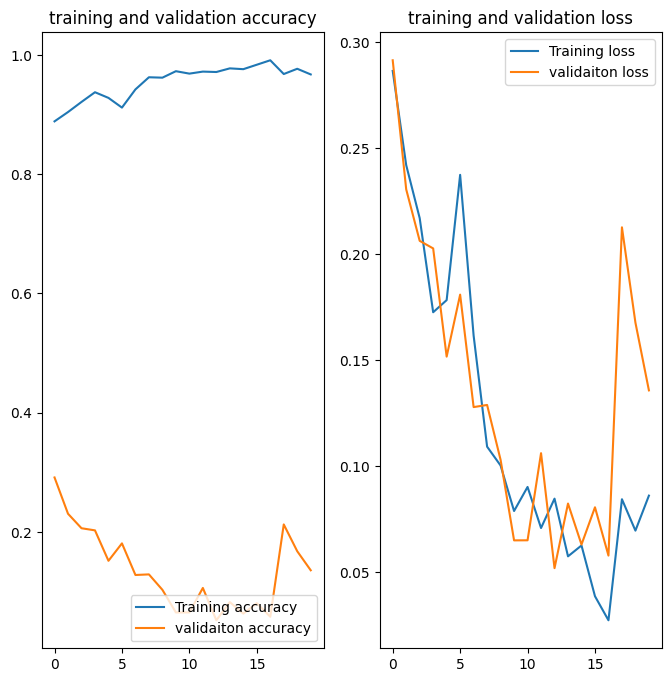

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training accuracy")
plt.plot(range(EPOCHS), val_acc, label="validaiton accuracy")
plt.legend(loc="lower right")
plt.title("training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Training loss")
plt.plot(range(EPOCHS), val_loss, label="validaiton loss")
plt.legend(loc="upper right")
plt.title("training and validation loss")

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 40ms/step


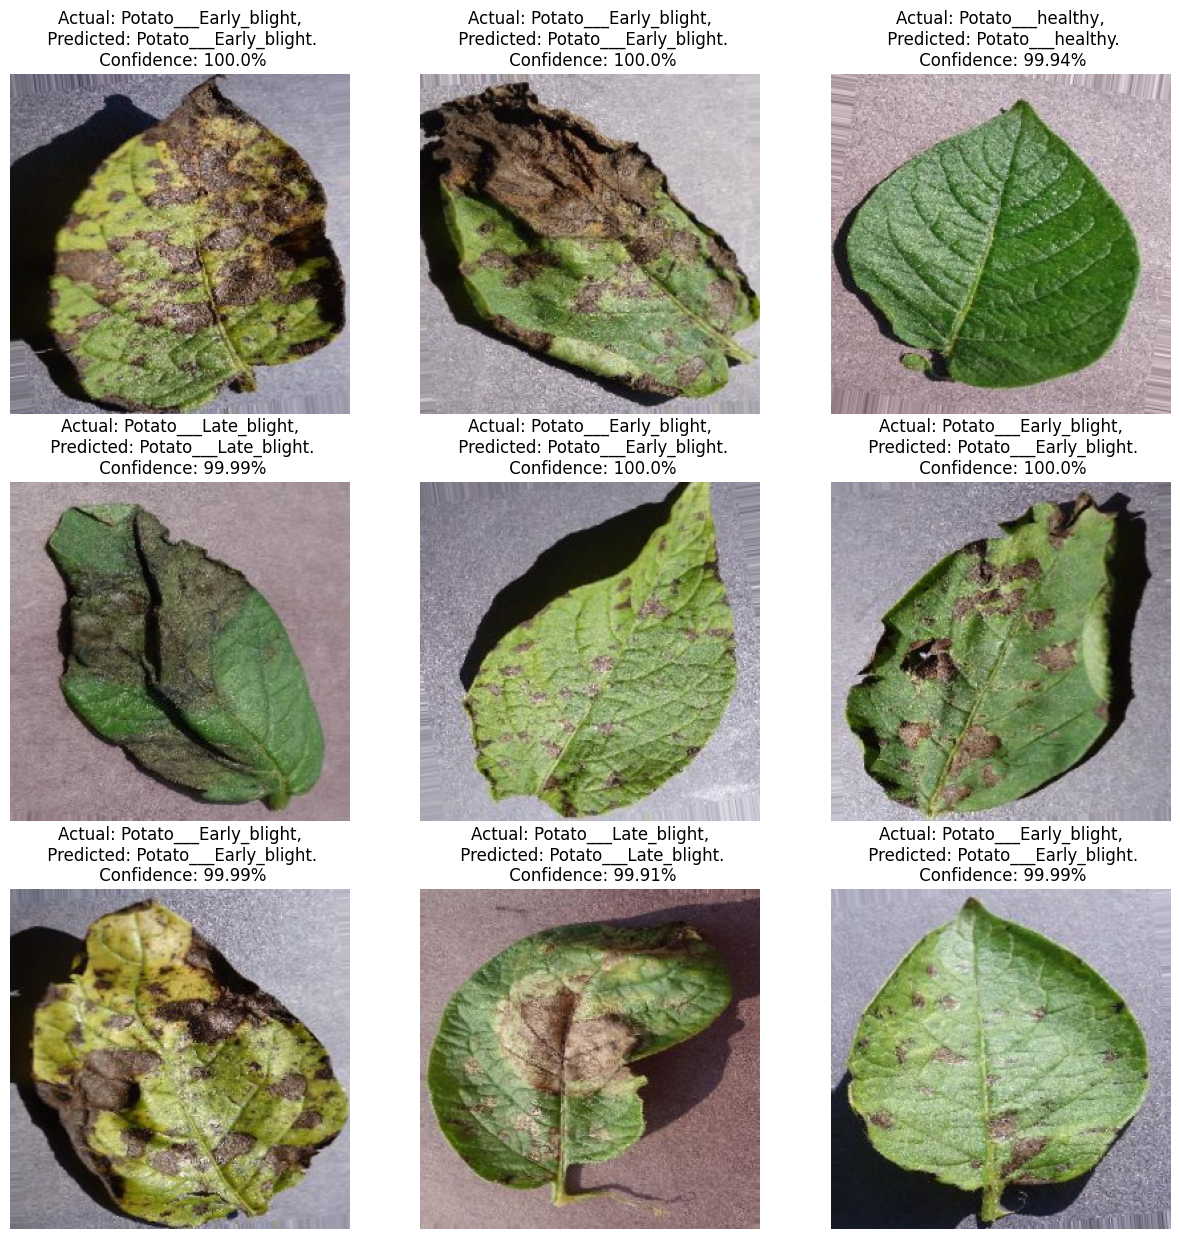

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [40]:
model.save("../potatoes.h5")

c:\Users\Betul\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
